<a href="https://colab.research.google.com/github/gundaminpde/2023-spring/blob/main/01_3_pandas_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an exact dupulicate of a tutorial by Dr. Tirthajyoti Sarkar, Fremont, CA, 94536. You can find the original one at https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Pandas%20and%20Numpy/Pandas_Operations.ipynb

# **Series**

# Loading packages and initializations

In [2]:
import numpy as np
import pandas as pd

labels = ['a','b','c']
my_data = [10,20,30]

arr = np.array(my_data)

d = {'a':10,'b':20,'c':30}

print ("Labels:", labels)
print("My data:", my_data)
print("Dictionary:", d)

Labels: ['a', 'b', 'c']
My data: [10, 20, 30]
Dictionary: {'a': 10, 'b': 20, 'c': 30}


# Creating a Series (Pandas class)

* data만 넣어 만든 series

In [ ]:
pd.Series(data=my_data) # Output looks very similar to a NumPy array

0    10
1    20
2    30
dtype: int64

* data와 index를 넣어 만든 series

In [ ]:
pd.Series(data=my_data, index=labels) # Note the extra information about index

a    10
b    20
c    30
dtype: int64

* numpy data로 만든 series

In [ ]:
# Inputs are in order of the expected parameters (not explicitly named), NumPy array is used for data
pd.Series(arr, labels)

a    10
b    20
c    30
dtype: int64

* 앞에서 dictionary로 만들어 놓은 d를 사용하여 만들어 본 series

In [ ]:
pd.Series(d) # Using a pre-defined Dictionary object


a    10
b    20
c    30
dtype: int64

# What type of values can a Pandas Series hold?

In [ ]:
print ("\nHolding numerical data\n",'-'*25, sep='')
print(pd.Series(arr))

print ("\nHolding text labels\n",'-'*20, sep='')
print(pd.Series(labels))

print ("\nHolding functions\n",'-'*20, sep='')
print(pd.Series(data=[sum,print,len]))    ### 이미 기본적으로 정의된 함수들을 넣어 보니

print ("\nHolding objects from a dictionary\n",'-'*40, sep='')
print(pd.Series(data=[d.keys, d.items, d.values])) ### d는 앞에서 정의된 dictionary이며 그것의 keys 등등을 넣어봄.


Holding numerical data
-------------------------
0    10
1    20
2    30
dtype: int64

Holding text labels
--------------------
0    a
1    b
2    c
dtype: object

Holding functions
--------------------
0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

Holding objects from a dictionary
----------------------------------------
0    <built-in method keys of dict object at 0x7fa4...
1    <built-in method items of dict object at 0x7fa...
2    <built-in method values of dict object at 0x7f...
dtype: object


# Indexing and slicing

In [5]:

ser1 = pd.Series([1,2,3,4],['CA', 'OR', 'CO', 'AZ'])
ser2 = pd.Series([1,2,5,4],['CA', 'OR', 'NV', 'AZ'])

print ("\n ser1은 이렇게 생겼어요. CA, OR 등등은 index에요. 1,2,3,4가 값이고...  \n",'-'*56, sep='')
print(ser1)

print ("\nIndexing by name of the item/object (string identifier)\n",'-'*56, sep='')
print("Value for CA in ser1:", ser1['CA'])
print("Value for AZ in ser1:", ser1['AZ'])
print("Value for NV in ser2:", ser2['NV'])

print ("\nIndexing by number (positional value in the series)\n",'-'*52, sep='')
print("Value for CA in ser1:", ser1[0])
print("Value for AZ in ser1:", ser1[3])
print("Value for NV in ser2:", ser2[2])

print ("\nIndexing by a range\n",'-'*25, sep='')
print ("Value for OR, CO, and AZ in ser1:\n", ser1[1:4], sep='')


print ("\nHead of ser1\n",'-'*25, sep='')
print ("Head of ser1:\n", ser1.head(), sep='')

ser1


 ser1은 이렇게 생겼어요. CA, OR 등등은 index에요. 1,2,3,4가 값이고...  
--------------------------------------------------------
CA    1
OR    2
CO    3
AZ    4
dtype: int64

Indexing by name of the item/object (string identifier)
--------------------------------------------------------
Value for CA in ser1: 1
Value for AZ in ser1: 4
Value for NV in ser2: 5

Indexing by number (positional value in the series)
----------------------------------------------------
Value for CA in ser1: 1
Value for AZ in ser1: 4
Value for NV in ser2: 5

Indexing by a range
-------------------------
Value for OR, CO, and AZ in ser1:
OR    2
CO    3
AZ    4
dtype: int64

Head of ser1
-------------------------
Head of ser1:
CA    1
OR    2
CO    3
AZ    4
dtype: int64


CA    1
OR    2
CO    3
AZ    4
dtype: int64

# Adding/Merging two series with common indices

합쳐보기도 하고, 곱해보기도 하는데, 

인덱스를 가 공유되어야 작동하고, 공유가 안되면 불가능합니다.

In [6]:
ser1 = pd.Series([1,2,3,4],['CA', 'OR', 'CO', 'AZ'])
ser2 = pd.Series([1,2,5,4],['CA', 'OR', 'NV', 'AZ'])

### 이제 합쳐봅니다.

ser3 = ser1+ser2

print ("\nAfter adding the two series, the result looks like this...\n",'-'*59, sep='')
print(ser3)

print("\nPython tries to add values where it finds common index name, and puts NaN where indices are missing\n")

##3 다음으로 곱해봅니다.

print ("\nThe idea works even for multiplication...\n",'-'*43, sep='')
print (ser1*ser2)


## exp 승이나 사용로그 등을 적용해 봅니다. 값이 이상하겠죠.

print ("\nOr even for combination of mathematical operations!\n",'-'*53, sep='')
print (np.exp(ser1)+np.log10(ser2))



After adding the two series, the result looks like this...
-----------------------------------------------------------
AZ    8.0
CA    2.0
CO    NaN
NV    NaN
OR    4.0
dtype: float64

Python tries to add values where it finds common index name, and puts NaN where indices are missing


The idea works even for multiplication...
-------------------------------------------
AZ    16.0
CA     1.0
CO     NaN
NV     NaN
OR     4.0
dtype: float64

Or even for combination of mathematical operations!
-----------------------------------------------------
AZ    55.200210
CA     2.718282
CO          NaN
NV          NaN
OR     7.690086
dtype: float64


# **DataFrame** 

In [ ]:
from numpy.random import randn as rn

### rand하고 n이네요. 정규분포지요.


# Creating and accessing DataFrame

*   Indexing
*   Adding and deleting rows and columns
*   Subsetting DataFrame



# **DataFrame 만들기 1**

## data, index, columns의 이름

In [ ]:
## seed를 꼭 설명해야 한다. 사용할 난수표를 한 개 고정합니다. 101 난수표.

np.random.seed(101)

matrix_data = rn(5,4)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print("\nThe data frame looks like\n",'-'*45, sep='')
print(df)


The data frame looks like
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


# **.head()**

이건 꼭 아셔야 합니다.

In [ ]:
df.head(n=3)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001


In [ ]:
df.tail(n=3)

,W,X,Y,Z
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


# Indexing and slicing (columns)

# df['컬럼 이름']
# df[['컬럼1','컬럼2','컬럼3']]

In [ ]:
print("\nThe 'X' column\n",'-'*25, sep='')
print(df['X'])
print("\nType of the column: ", type(df['X']), sep='')
print("\nThe 'X' and 'Z' columns indexed by passing a list\n",'-'*55, sep='')
print(df[['X','Z']])
print("\nType of the pair of columns: ", type(df[['X','Z']]), sep='')
print ("\nSo, for more than one column, the object turns into a DataFrame")



The 'X' column
-------------------------
A    0.628133
B   -0.319318
C    0.740122
D   -0.758872
E    1.978757
Name: X, dtype: float64

Type of the column: <class 'pandas.core.series.Series'>

The 'X' and 'Z' columns indexed by passing a list
-------------------------------------------------------
          X         Z
A  0.628133  0.503826
B -0.319318  0.605965
C  0.740122 -0.589001
D -0.758872  0.955057
E  1.978757  0.683509

Type of the pair of columns: <class 'pandas.core.frame.DataFrame'>

So, for more than one column, the object turns into a DataFrame


# df.컬럼이름   <== 따옴표 없다.

In [ ]:
print("\nThe 'X' column accessed by DOT method (NOT recommended)\n",'-'*55, sep='')
print(df.X)


The 'X' column accessed by DOT method (NOT recommended)
-------------------------------------------------------
A    0.628133
B   -0.319318
C    0.740122
D   -0.758872
E    1.978757
Name: X, dtype: float64


## Creating and deleting a (new) column (or row)

# drop('컬럼명', axis=1)으로 컬럼 날리기
# drop('인덱스명')으로 행(row) 날리기

In [ ]:
## 기존의 컬럼으로 새로운 컬럼을 만들기

print("\nA column is created by assigning it in relation to an existing column\n",'-'*75, sep='')

df['New'] = df['X']+df['Z']
df['New (Sum of X and Z)'] = df['X']+df['Z']

print(df)

##  drop으로 컬럼 날리기

print("\nA column is dropped by using df.drop() method\n",'-'*55, sep='')
df = df.drop('New', axis=1) # Notice the axis=1 option, axis = 0 is default, so one has to change it to 1
print(df)
df1=df.drop('A')
print("\nA row (index) is dropped by using df.drop() method and axis=0\n",'-'*65, sep='')
print(df1)
print("\nAn in-place change can be done by making inplace=True in the drop method\n",'-'*75, sep='')
df.drop('New (Sum of X and Z)', axis=1, inplace=True)
print(df)


A column is created by assigning it in relation to an existing column
---------------------------------------------------------------------------
          W         X         Y         Z       New  New (Sum of X and Z)
A  2.706850  0.628133  0.907969  0.503826  1.131958              1.131958
B  0.651118 -0.319318 -0.848077  0.605965  0.286647              0.286647
C -2.018168  0.740122  0.528813 -0.589001  0.151122              0.151122
D  0.188695 -0.758872 -0.933237  0.955057  0.196184              0.196184
E  0.190794  1.978757  2.605967  0.683509  2.662266              2.662266

A column is dropped by using df.drop() method
-------------------------------------------------------
          W         X         Y         Z  New (Sum of X and Z)
A  2.706850  0.628133  0.907969  0.503826              1.131958
B  0.651118 -0.319318 -0.848077  0.605965              0.286647
C -2.018168  0.740122  0.528813 -0.589001              0.151122
D  0.188695 -0.758872 -0.933237  0.955057         

# Selecting/indexing Rows

* Label-based 'loc' method
* Index (numeric) 'iloc' method

# df.iloc[숫자]를 사용합니다. 엄청 중요해요.

# .iloc[] 함수

.iloc[position] : 
* [position] = [N], N 행
* [position] = [행 범위, 열범위] 

  표기 a:b = a부터 b-1까지 (a부터 b 앞까지)

  # 예를 들어, df1 = df.iloc[2:,1:5] 

* [position] = [[특정 행 들], [특정 열 들]]

  범위를 지정해주는 ":"와 달리 콤마 (,) 를 사용하여 특정 1, 2, 4 행의 0, 2 번째 컬럼만 가져와준다.



In [ ]:
print("\nLabel-based 'loc' method can be used for selecting row(s)\n",'-'*60, sep='')
print("\nSingle row\n")
print(df.loc['C'])
print("\nMultiple rows\n")
print(df.loc[['B','C']])
print("\nIndex position based 'iloc' method can be used for selecting row(s)\n",'-'*70, sep='')
print("\nSingle row\n")
print(df.iloc[2])
print("\nMultiple rows\n")
print(df.iloc[[1,2]])


Label-based 'loc' method can be used for selecting row(s)
------------------------------------------------------------

Single row

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

Multiple rows

          W         X         Y         Z
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001

Index position based 'iloc' method can be used for selecting row(s)
----------------------------------------------------------------------

Single row

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

Multiple rows

          W         X         Y         Z
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001


# Subsetting DataFrame

# df.loc['행','열'] 

# df.loc[['행1','행2'],['열1','열2']]

In [ ]:
np.random.seed(101)
matrix_data = rn(5,4)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']
df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)

print("\nThe DatFrame\n",'-'*45, sep='')
print(df)
print("\nElement at row 'B' and column 'Y' is\n") 
print(df.loc['B','Y'])
print("\nSubset comprising of rows B and D, and columns W and Y, is\n")
df.loc[['B','D'],['W','Y']]


The DatFrame
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

Element at row 'B' and column 'Y' is

-0.8480769834036315

Subset comprising of rows B and D, and columns W and Y, is



,W,Y
B,0.651118,-0.848077
D,0.188695,-0.933237


# **Conditional selection, index (re)setting, multi-index**

# Basic idea of conditional check and Boolean DataFrame

# True False를 이용해서 골라내는 기법입니다.

In [ ]:
print("\nThe DataFrame\n",'-'*45, sep='')
print(df)

print("\nBoolean DataFrame(s) where we are checking if the values are greater than 0\n",'-'*75, sep='')
print(df>0)   ## df의 원소들이 >0인지 아닌지... T/F

print("\n")
print(df.loc[['A','B','C']]>0) ## .loc[[행 이름들...]]

booldf = df>0  ## T/F 로 행렬을 만든다.
print("\nDataFrame indexed by boolean dataframe\n",'-'*45, sep='')
print(df[booldf]) ## 이것으로 뽑아낸다. 그래서 F인 부분은 NaN이다.



The DataFrame
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

Boolean DataFrame(s) where we are checking if the values are greater than 0
---------------------------------------------------------------------------
       W      X      Y      Z
A   True   True   True   True
B   True  False  False   True
C  False   True   True  False
D   True  False  False   True
E   True   True   True   True


       W      X      Y      Z
A   True   True   True   True
B   True  False  False   True
C  False   True   True  False

DataFrame indexed by boolean dataframe
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118       NaN       NaN  0.605965
C       NaN  0.74012

# Passing Boolean series to conditionally subset the DataFrame

## * 키의 컬럼 중에서 키가 65이상인 것을 골라내고 그 행만 뽑는 기술...

## * 키가 65이상이고 몸무게 146이상... &이용.

In [ ]:
matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')

print(type(matrix_data))

row_labels = ['A','B','C','D','E']
column_headings = ['Age', 'Height', 'Weight']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print("\nA new DataFrame\n",'-'*25, sep='')
print(df)

### 키의 컬럼 중에서 키가 65이상인 것을 골라내고 그 행만 뽑는 기술...
 
print("\nRows with Height > 65 inch\n",'-'*35, sep='')
print(df[df['Height']>65])

booldf1 = df['Height']>65
booldf2 = df['Weight']>145
print("\nRows with Height > 65 inch and Weight >145 lbs\n",'-'*55, sep='')
print(df[(booldf1) & (booldf2)])

print("\nDataFrame with only Age and Weight columns whose Height > 65 inch\n",'-'*68, sep='')
print(df[booldf1][['Age','Weight']])

<class 'numpy.matrix'>

A new DataFrame
-------------------------
   Age  Height  Weight
A   22      66     140
B   42      70     148
C   30      62     125
D   35      68     160
E   25      62     152

Rows with Height > 65 inch
-----------------------------------
   Age  Height  Weight
A   22      66     140
B   42      70     148
D   35      68     160

Rows with Height > 65 inch and Weight >145 lbs
-------------------------------------------------------
   Age  Height  Weight
B   42      70     148
D   35      68     160

DataFrame with only Age and Weight columns whose Height > 65 inch
--------------------------------------------------------------------
   Age  Weight
A   22     140
B   42     148
D   35     160


# Reset_index and Set_Index

In [ ]:
matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')
row_labels = ['A','B','C','D','E']
column_headings = ['Age', 'Height', 'Weight']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print("\nThe DataFrame\n",'-'*25, sep='')
print(df)

## 원래 인덱스 A,B,C가 컬럼으로 변함.
print("\nAfter resetting index\n",'-'*35, sep='')
print(df.reset_index())


## 인덱스 A,B,C를 날려버림
print("\nAfter resetting index with 'drop' option TRUE\n",'-'*45, sep='')
print(df.reset_index(drop=True))

## Profession 컬럼을 만들어 문장을 잘라서 넣음.
print("\nAdding a new column 'Profession'\n",'-'*45, sep='')
df['Profession'] = "Student Teacher Engineer Doctor Nurse".split()
print(df)

## Profession 컬럼을 인덱스로 넣는다.
print("\nSetting 'Profession' column as index\n",'-'*45, sep='')
print (df.set_index('Profession'))


The DataFrame
-------------------------
   Age  Height  Weight
A   22      66     140
B   42      70     148
C   30      62     125
D   35      68     160
E   25      62     152

After resetting index
-----------------------------------
  index  Age  Height  Weight
0     A   22      66     140
1     B   42      70     148
2     C   30      62     125
3     D   35      68     160
4     E   25      62     152

After resetting index with 'drop' option TRUE
---------------------------------------------
   Age  Height  Weight
0   22      66     140
1   42      70     148
2   30      62     125
3   35      68     160
4   25      62     152

Adding a new column 'Profession'
---------------------------------------------
   Age  Height  Weight Profession
A   22      66     140    Student
B   42      70     148    Teacher
C   30      62     125   Engineer
D   35      68     160     Doctor
E   25      62     152      Nurse

Setting 'Profession' column as index
-----------------------------------

# Multi-indexing

In [ ]:

# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))

print("\nTuple pairs after the zip and list command\n",'-'*45, sep='')
print(hier_index)
hier_index = pd.MultiIndex.from_tuples(hier_index)
print("\nIndex hierarchy\n",'-'*25, sep='')
print(hier_index)
print("\nIndex hierarchy type\n",'-'*25, sep='')
print(type(hier_index))

print("\nCreating DataFrame with multi-index\n",'-'*37, sep='')
np.random.seed(101)
df1 = pd.DataFrame(data=np.round(rn(6,3),2), index= hier_index, columns= ['A','B','C'])
print(df1)

print("\nSubsetting multi-index DataFrame using two 'loc' methods\n",'-'*60, sep='')
print(df1.loc['G2'].loc[[1,3]][['B','C']])

print("\nNaming the indices by 'index.names' method\n",'-'*45, sep='')
df1.index.names=['Outer', 'Inner']
print(df1)




Tuple pairs after the zip and list command
---------------------------------------------
[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]

Index hierarchy
-------------------------
MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

Index hierarchy type
-------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>

Creating DataFrame with multi-index
-------------------------------------
         A     B     C
G1 1  2.71  0.63  0.91
   2  0.50  0.65 -0.32
   3 -0.85  0.61 -2.02
G2 1  0.74  0.53 -0.59
   2  0.19 -0.76 -0.93
   3  0.96  0.19  1.98

Subsetting multi-index DataFrame using two 'loc' methods
------------------------------------------------------------
      B     C
1  0.53 -0.59
3  0.19  1.98

Naming the indices by 'index.names' method
---------------------------------------------
                A     B     C
Outer Inner                  
G1    

# Cross-section ('XS') command

In [ ]:
print("\nGrabbing a cross-section from outer level\n",'-'*45, sep='')
print(df1.xs('G1'))
print("\nGrabbing a cross-section from inner level (for all outer levels)\n",'-'*65, sep='')
print(df1.xs(2,level='Inner'))


Grabbing a cross-section from outer level
---------------------------------------------
          A     B     C
Inner                  
1      2.71  0.63  0.91
2      0.50  0.65 -0.32
3     -0.85  0.61 -2.02

Grabbing a cross-section from inner level (for all outer levels)
-----------------------------------------------------------------
          A     B     C
Outer                  
G1     0.50  0.65 -0.32
G2     0.19 -0.76 -0.93


# Missing Values

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]})
df['States']="CA NV AZ".split()
df.set_index('States',inplace=True)
print(df)

          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  NaN  2
AZ      NaN  NaN  3


# Pandas 'dropna' method

In [ ]:
print("\nDropping any rows with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=0))
print("\nDropping any column with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=1))
print("\nDropping a row with a minimum 2 NaN value using 'thresh' parameter\n",'-'*68, sep='')
print(df.dropna(axis=0, thresh=2))


Dropping any rows with a NaN value
-----------------------------------
          A    B  C
States             
CA      1.0  5.0  1

Dropping any column with a NaN value
-----------------------------------
        C
States   
CA      1
NV      2
AZ      3

Dropping a row with a minimum 2 NaN value using 'thresh' parameter
--------------------------------------------------------------------
          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  NaN  2


# Pandas 'fillna' method

In [ ]:
print("\nFilling values with a default value\n",'-'*35, sep='')
print(df.fillna(value='FILL VALUE'))
print("\nFilling values with a computed value (mean of column A here)\n",'-'*60, sep='')
print(df.fillna(value=df['A'].mean()))



Filling values with a default value
-----------------------------------
                 A           B  C
States                           
CA             1.0         5.0  1
NV             2.0  FILL VALUE  2
AZ      FILL VALUE  FILL VALUE  3

Filling values with a computed value (mean of column A here)
------------------------------------------------------------
          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  1.5  2
AZ      1.5  1.5  3


# **GroupBy method**

In [ ]:

# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df


,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [ ]:
byComp = df.groupby('Company')
print(byComp.head())

print("\nGrouping by 'Company' column and listing mean sales\n",'-'*55, sep='')
print(byComp.mean())

print("\n같은방법\n",'-'*55, sep='')
print(df.groupby('Company').mean())

print("\nGrouping by 'Company' column and listing sum of sales\n",'-'*55, sep='')
print(byComp.sum())


print("\n같은방법\n",'-'*55, sep='')
print(df.groupby('Company').sum())


# Note dataframe conversion of the series and transpose
print("\nAll in one line of command (Stats for 'FB')\n",'-'*65, sep='')
print(pd.DataFrame(df.groupby('Company').describe().loc['FB']).transpose())
print("\nSame type of extraction with little different command\n",'-'*68, sep='')
print(df.groupby('Company').describe().loc[['GOOG', 'MSFT']])



  Company   Person  Sales
0    GOOG      Sam    200
1    GOOG  Charlie    120
2    MSFT      Amy    340
3    MSFT  Vanessa    124
4      FB     Carl    243
5      FB    Sarah    350

Grouping by 'Company' column and listing mean sales
-------------------------------------------------------
         Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

같은방법
-------------------------------------------------------
         Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

Grouping by 'Company' column and listing sum of sales
-------------------------------------------------------
         Sales
Company       
FB         593
GOOG       320
MSFT       464

같은방법
-------------------------------------------------------
         Sales
Company       
FB         593
GOOG       320
MSFT       464

All in one line of command (Stats for 'FB')
-----------------------------------------------------------------
   Sales                                                       

# **Merging, Joining, Concatenating**

# Concatenation

In [ ]:
# Creating data frames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8,9,10,11])

print("\nThe DataFrame number 1\n",'-'*30, sep='')
print(df1)
print("\nThe DataFrame number 2\n",'-'*30, sep='')
print(df2)
print("\nThe DataFrame number 3\n",'-'*30, sep='')
print(df3)


The DataFrame number 1
------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

The DataFrame number 2
------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

The DataFrame number 3
------------------------------
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [ ]:
df_cat1 = pd.concat([df1,df2,df3], axis=0)
print("\nAfter concatenation along row\n",'-'*30, sep='')
print(df_cat1)

df_cat2 = pd.concat([df1,df2,df3], axis=1)
print("\nAfter concatenation along column\n",'-'*60, sep='')
print(df_cat2)
df_cat2.fillna(value=0, inplace=True)
print("\nAfter filling missing values with zero\n",'-'*60, sep='')
print(df_cat2)



After concatenation along row
------------------------------
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

After concatenation along column
------------------------------------------------------------
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   

# 다시, 인덱스를 공유해서 한 번 더

In [ ]:
# Creating data frames
df4 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df5 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[0, 1, 2, 3])

df6 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[0, 1, 2, 3])

print("\nThe DataFrame number 1\n",'-'*30, sep='')
print(df4)
print("\nThe DataFrame number 2\n",'-'*30, sep='')
print(df5)
print("\nThe DataFrame number 3\n",'-'*30, sep='')
print(df6)


The DataFrame number 1
------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

The DataFrame number 2
------------------------------
    A   B   C   D
0  A4  B4  C4  D4
1  A5  B5  C5  D5
2  A6  B6  C6  D6
3  A7  B7  C7  D7

The DataFrame number 3
------------------------------
     A    B    C    D
0   A8   B8   C8   D8
1   A9   B9   C9   D9
2  A10  B10  C10  D10
3  A11  B11  C11  D11


In [ ]:
df_cat4 = pd.concat([df4,df5,df6], axis=0)
print("\nAfter concatenation along row\n",'-'*30, sep='')
print(df_cat1)

df_cat5 = pd.concat([df4,df5,df6], axis=1)
print("\nAfter concatenation along column\n",'-'*60, sep='')
print(df_cat5)
df_cat5.fillna(value=0, inplace=True)



After concatenation along row
------------------------------
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

After concatenation along column
------------------------------------------------------------
    A   B   C   D   A   B   C   D    A    B    C    D
0  A0  B0  C0  D0  A4  B4  C4  D4   A8   B8   C8   D8
1  A1  B1  C1  D1  A5  B5  C5  D5   A9   B9   C9   D9
2  A2  B2  C2  D2  A6  B6  C6  D6  A10  B10  C10  D10
3  A3  B3  C3  D3  A7  B7  C7  D7  A11  B11  C11  D11


# **Merging by a common 'key'**

The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together.

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

print("\nThe DataFrame 'left'\n",'-'*30, sep='')
print(left)
print("\nThe DataFrame 'right'\n",'-'*30, sep='')
print(right)


The DataFrame 'left'
------------------------------
  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

The DataFrame 'right'
------------------------------
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [ ]:
merge1= pd.merge(left,right,how='inner',on='key')
print("\nAfter simple merging with 'inner' method\n",'-'*50, sep='')
print(merge1)


After simple merging with 'inner' method
--------------------------------------------------
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


# Merging on a set of keys

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [ ]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [ ]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [ ]:

pd.merge(left, right, how='outer',on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [ ]:
pd.merge(left, right, how='left',on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [ ]:
pd.merge(left, right, how='right',on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3



# **Joining**

Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single DataFrame based on 'index keys'.

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [ ]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [ ]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# **Useful operations**

# **head() and unique values**

* head()
* unique()
* nunique()
* value_count()

# **정말 중요해요 ~ ~ ~**



In [ ]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4,5,6,7,8,9,10],
                   'col2':[444,555,666,444,333,222,666,777,666,555],
                   'col3':'aaa bb c dd eeee fff gg h iii j'.split()})
df

,col1,col2,col3
0,1,444,aaa
1,2,555,bb
2,3,666,c
3,4,444,dd
4,5,333,eeee
5,6,222,fff
6,7,666,gg
7,8,777,h
8,9,666,iii
9,10,555,j


In [ ]:
print("\nMethod head() is for showing first few entries\n",'-'*50, sep='')
df.head()


Method head() is for showing first few entries
--------------------------------------------------


,col1,col2,col3
0,1,444,aaa
1,2,555,bb
2,3,666,c
3,4,444,dd
4,5,333,eeee


In [ ]:
print("\nFinding unique values in 'col2'\n",'-'*40, sep='') # Note 'unique' method applies to pd.series only
print(df['col2'].unique())


Finding unique values in 'col2'
----------------------------------------
[444 555 666 333 222 777]


In [ ]:
print("\nFinding number of unique values in 'col2'\n",'-'*45, sep='')
print(df['col2'].nunique())


Finding number of unique values in 'col2'
---------------------------------------------
6


In [ ]:
print("\nTable of unique values in 'col2'\n",'-'*40, sep='')
t1=df['col2'].value_counts()
print(t1)


Table of unique values in 'col2'
----------------------------------------
666    3
444    2
555    2
333    1
222    1
777    1
Name: col2, dtype: int64


# **Applying functions**

Pandas work with 'apply' method to accept any user-defined function

In [ ]:
# Define a function
def testfunc(x):
    if (x> 500):
        return (10*np.log10(x))
    else:
        return (x/10)

In [ ]:
df['FuncApplied'] = df['col2'].apply(testfunc)
print(df)

   col1  col2  col3  FuncApplied
0     1   444   aaa    44.400000
1     2   555    bb    27.442930
2     3   666     c    28.234742
3     4   444    dd    44.400000
4     5   333  eeee    33.300000
5     6   222   fff    22.200000
6     7   666    gg    28.234742
7     8   777     h    28.904210
8     9   666   iii    28.234742
9    10   555     j    27.442930


# Apply works with built-in function too!

In [ ]:
df['col3length']= df['col3'].apply(len)
print(df)

   col1  col2  col3  FuncApplied  col3length
0     1   444   aaa    44.400000           3
1     2   555    bb    27.442930           2
2     3   666     c    28.234742           1
3     4   444    dd    44.400000           2
4     5   333  eeee    33.300000           4
5     6   222   fff    22.200000           3
6     7   666    gg    28.234742           2
7     8   777     h    28.904210           1
8     9   666   iii    28.234742           3
9    10   555     j    27.442930           1


# Combine 'apply' with lambda expession for in-line calculations

In [ ]:
df['FuncApplied'].apply(lambda x: np.sqrt(x))

0    6.663332
1    5.238600
2    5.313637
3    6.663332
4    5.770615
5    4.711688
6    5.313637
7    5.376264
8    5.313637
9    5.238600
Name: FuncApplied, dtype: float64

# Standard statistical functions directly apply to columns

In [ ]:

print("\nSum of the column 'FuncApplied' is: ",df['FuncApplied'].sum())
print("Mean of the column 'FuncApplied' is: ",df['FuncApplied'].mean())
print("Std dev of the column 'FuncApplied' is: ",df['FuncApplied'].std())
print("Min and max of the column 'FuncApplied' are: ",df['FuncApplied'].min(),"and",df['FuncApplied'].max())


Sum of the column 'FuncApplied' is:  312.7942967255717
Mean of the column 'FuncApplied' is:  31.27942967255717
Std dev of the column 'FuncApplied' is:  7.4065059423607895
Min and max of the column 'FuncApplied' are:  22.2 and 44.4


# **Deletion, sorting, list of column and row names**


# Getting the names of the columns

In [ ]:
print("\nName of columns\n",'-'*20, sep='')
print(df.columns)
l = list(df.columns)
print("\nColumn names in a list of strings for later manipulation:\n")

print(l)


Name of columns
--------------------
Index(['col1', 'col2', 'col3', 'FuncApplied', 'col3length'], dtype='object')

Column names in a list of strings for later manipulation:

['col1', 'col2', 'col3', 'FuncApplied', 'col3length']


In [ ]:
df

,col1,col2,col3,FuncApplied,col3length
0,1,444,aaa,44.400000,3
1,2,555,bb,27.442930,2
2,3,666,c,28.234742,1
3,4,444,dd,44.400000,2
4,5,333,eeee,33.300000,4
5,6,222,fff,22.200000,3
6,7,666,gg,28.234742,2
7,8,777,h,28.904210,1
8,9,666,iii,28.234742,3
9,10,555,j,27.442930,1


# Deletion by 'del' command 

# This affects the dataframe immediately, unlike drop method.

In [ ]:
print("\nDeleting last column by 'del' command\n",'-'*50, sep='')
del df['col3length']
print(df)
df['col3length']= df['col3'].apply(len)


Deleting last column by 'del' command
--------------------------------------------------
   col1  col2  col3  FuncApplied
0     1   444   aaa    44.400000
1     2   555    bb    27.442930
2     3   666     c    28.234742
3     4   444    dd    44.400000
4     5   333  eeee    33.300000
5     6   222   fff    22.200000
6     7   666    gg    28.234742
7     8   777     h    28.904210
8     9   666   iii    28.234742
9    10   555     j    27.442930


# Sorting and Ordering a DataFrame

In [ ]:
df.sort_values(by='col2') #inplace=False by default

,col1,col2,col3,FuncApplied,col3length
5,6,222,fff,22.200000,3
4,5,333,eeee,33.300000,4
0,1,444,aaa,44.400000,3
3,4,444,dd,44.400000,2
1,2,555,bb,27.442930,2
9,10,555,j,27.442930,1
2,3,666,c,28.234742,1
6,7,666,gg,28.234742,2
8,9,666,iii,28.234742,3
7,8,777,h,28.904210,1


In [ ]:
df.sort_values(by='FuncApplied',ascending=False) #inplace=False by default

,col1,col2,col3,FuncApplied,col3length
0,1,444,aaa,44.400000,3
3,4,444,dd,44.400000,2
4,5,333,eeee,33.300000,4
7,8,777,h,28.904210,1
2,3,666,c,28.234742,1
6,7,666,gg,28.234742,2
8,9,666,iii,28.234742,3
1,2,555,bb,27.442930,2
9,10,555,j,27.442930,1
5,6,222,fff,22.200000,3


# Find Null Values or Check for Null Values

In [ ]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [ ]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


In [ ]:
df.fillna('FILL')

,col1,col2,col3
0,1.0,FILL,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,FILL,444.0,xyz


# Pivot Table

In [ ]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [ ]:
# Index out of 'A' and 'B', columns from 'C', actual numerical values from 'D'
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [ ]:
# Index out of 'A' and 'B', columns from 'C', actual numerical values from 'D'
df.pivot_table(values='D',index=['A', 'B'],columns=['C'], fill_value='FILLED')

C             x       y
A   B                  
bar one     4.0     1.0
    two  FILLED     5.0
foo one     1.0     3.0
    two     2.0  FILLED

# **Pandas built-in Visualization**

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
targetUrl_iris="https://raw.githubusercontent.com/gundaminpde/2022/main/iris.csv"

df = pd.read_csv(targetUrl_iris)   ## index_col=0

df.head()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


# .iloc[] 함수

.iloc[position] : 
* [position] = [N], N 행
* [position] = [행 범위, 열범위] 

  표기 a:b = a부터 b-1까지 (a부터 b 앞까지)
* [position] = [[특정 행 들], [특정 열 들]]

  범위를 지정해주는 : 와 달리 콤마 (,) 를 사용하여 특정 1, 2, 4 행의 0, 2 번째 컬럼만 가져와준다.

In [ ]:
df1 = df.iloc[0:,1:5]

df1

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Histogram of a single column

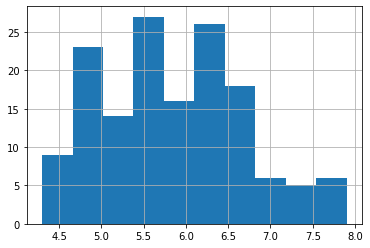

In [ ]:
df1['Sepal_Length'].hist()

Histogram with a different set of arguments (list of columns, bins, figure size, etc)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4a334d4c0>,
      dtype=object)

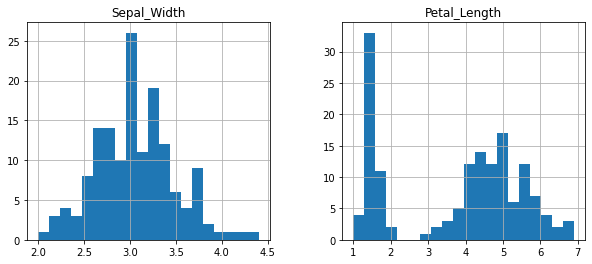

In [ ]:
df1.hist(column=['Sepal_Width','Petal_Length'],bins=20,figsize=(10,4))

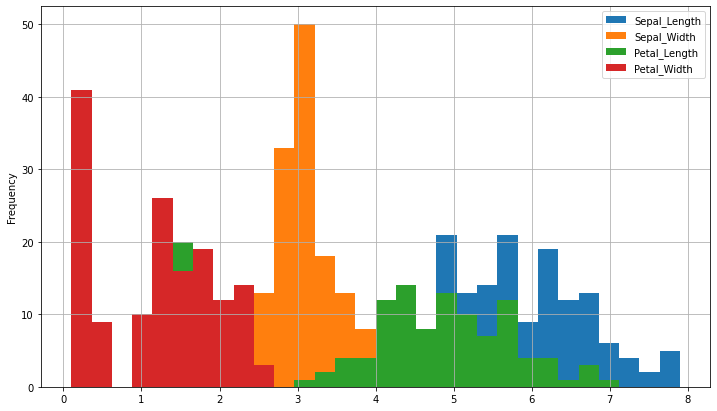

In [ ]:
df1.plot(kind='hist', bins=30, grid=True, figsize=(12,7))

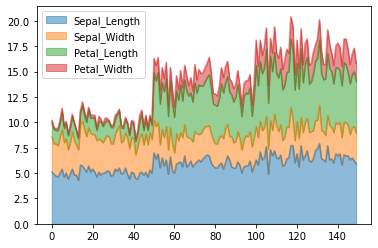

In [ ]:
import seaborn as sns #Plot style will change to Seaborn package style from now on

df1.plot.area(alpha=0.5)

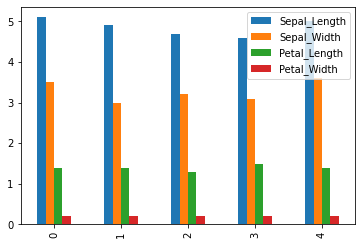

In [ ]:
df1[:5].plot.bar()

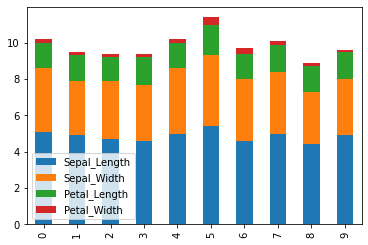

In [ ]:
df1[:10].plot.bar(stacked=True)

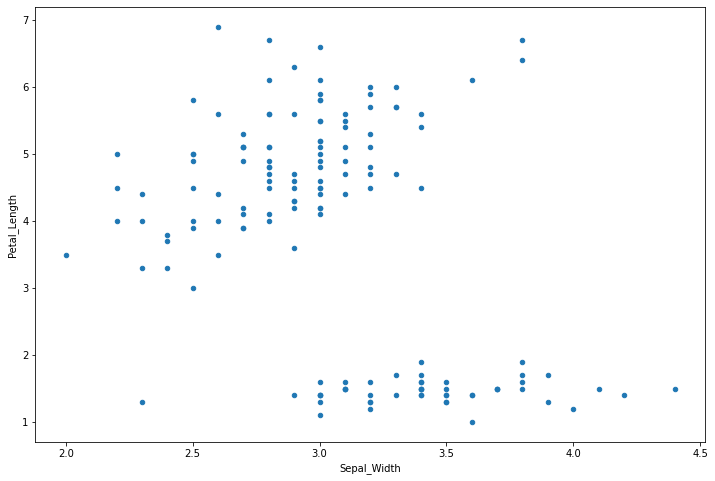

In [ ]:

df1.plot.scatter(x='Sepal_Width',y='Petal_Length',figsize=(12,8))


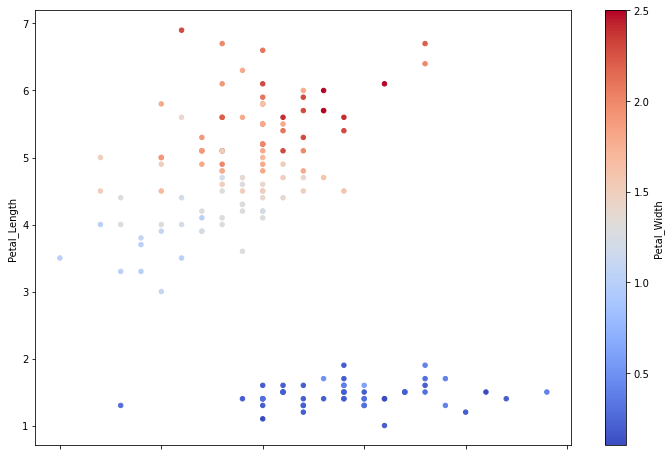

In [ ]:

df1.plot.scatter(x='Sepal_Width',y='Petal_Length', c= 'Petal_Width', cmap='coolwarm',figsize=(12,8))

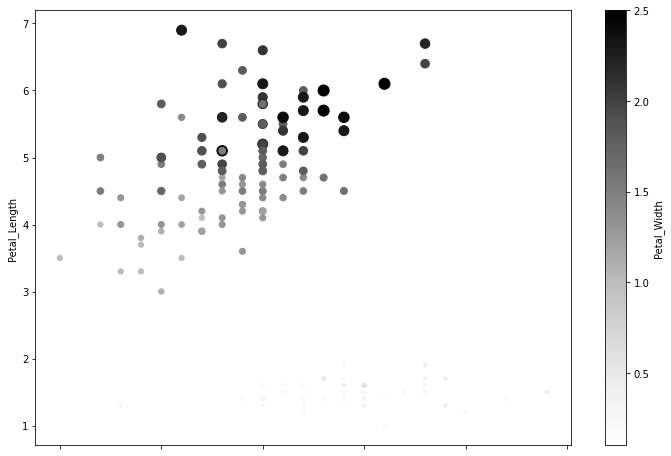

In [ ]:
df1.plot.scatter(x='Sepal_Width',y='Petal_Length',s=10*np.exp(df1['Petal_Width']),c='Petal_Width',figsize=(12,8)) # Size of the dots set based on column C

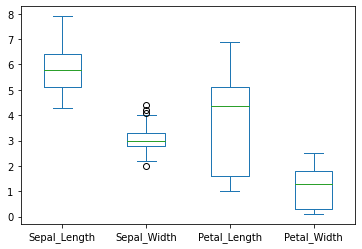

In [ ]:
df1.plot.box()

In [ ]:
df=pd.DataFrame(data=np.random.randn(1000,2),columns=['A','B'])
df.head()

,A,B
0,2.605967,0.683509
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528
4,0.166905,0.184502


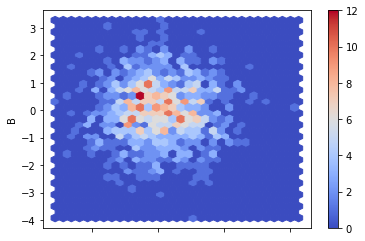

In [ ]:
df.plot.hexbin(x='A',y='B',gridsize=30,cmap='coolwarm')

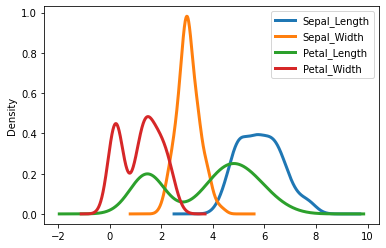

In [ ]:
df1.plot.density(lw=3)